In [1]:
from glob import glob
from src.utils import *

In [2]:
get_isotopes_df()

,Isotope,Energies (keV),Notes
0,Cs-137,[661.7],Decay product: Ba-137m
1,Co-60,"[1173.2, 1332.5]",Dual gamma peaks for decay
2,I-131,[364.5],Used in medical diagnostics
3,Tc-99m,[140.5],Widely used in nuclear medicine
4,Ra-226,"[186.2, 609.3, 1120.3, 1764.5]",Includes a complex decay series
5,Th-232,"[338.3, 911.2, 2614.5]",Part of the decay chain
6,U-238,"[234.0, 1001.0]",Decay includes radon progeny
7,K-40,[1460.8],Natural isotope in potassium
8,Am-241,[59.5],Common in smoke detectors
9,Na-22,"[511.0, 1274.5]",Positron annihilation peak


In [3]:
df = pd.read_parquet('results_prominence=500_rel_height=0.5_width=5_tolerance=0.7.pq')
df["filename"] = df["filename"].str.replace("\\", "/")
df 


,filename,peaks,calculated_polynomial,fitted_peaks_mean,fitted_peaks_std,identified_isotopes,identified_peaks,confidences,matched,total_confidences
0,Daten/2016-11-21_09-27-54_Summenspektrum.txt,"[18, 258, 293, 2278]","[4.79180021167972, 74.49322393286693, 84.65855...","[4.76137307340245, 74.74694125621012, 84.71173...","[1.2061180759638828, 0.8994092399012966, 0.798...",[Cs-137],[661.3911816685418],[0.9289302314797583],[1.0],[0.9289302314797583]
1,Daten/2016-11-24_07-16-40_Summenspektrum.txt,"[21, 33, 259, 293, 393, 638, 2278]","[5.66302782423073, 9.14794844759017, 74.783660...","[5.542068447473121, 9.012225287591614, 74.7399...","[1.0552481992968843, 1.327251955969061, 0.8109...","[Ra-226, Cs-137]","[184.9841847636407, 661.4299209577953]","[0.7876719183300314, 0.8673736514000012]","[0.25, 1.0]","[0.19691797958250784, 0.8673736514000012]"
2,Daten/2016-11-25_12-59-15_Summenspektrum.txt,"[259, 2277]","[74.78366015242995, 661.1142229767994]","[74.68331556273748, 661.2150415767584]","[0.6374344646350101, 0.731104329465915]",[Cs-137],[661.2150415767584],[0.8025197630444382],[1.0],[0.8025197630444382]
3,Daten/2016-11-28_07-17-31_Summenspektrum.txt,"[15, 2278]","[3.9205736164442504, 661.4048874141486]","[3.8043102161525417, 661.3668209392551]","[1.148171616070695, 0.7782814506475919]",[Cs-137],[661.3668209392551],[0.9124399268619411],[1.0],[0.9124399268619411]
4,Daten/2016-11-29_08-48-54_Summenspektrum.txt,[2277],[661.1142229767994],[661.2179912953839],[0.7250499465652561],[Cs-137],[661.2179912953839],[0.8017364075040307],[1.0],[0.8017364075040307]
...,...,...,...,...,...,...,...,...,...,...
1241,Daten/2024-09-26_07-09-35_Summenspektrum.txt,[],[],[],[],[],[],[],[],[]
1242,Daten/2024-09-27_07-18-35_Summenspektrum.txt,[],[],[],[],[],[],[],[],[]
1243,Daten/2024-09-30_07-57-21_Summenspektrum.txt,[],[],[],[],[],[],[],[],[]
1244,Daten/2024-10-01_07-53-29_Summenspektrum.txt,[],[],[],[],[],[],[],[],[]


In [4]:
process_spectrum(df.iloc[7]["filename"], prominence=1000, verbose=True) #if many peaks and high uncertainty it matches to many isotopes -> higher scoring threshold?

Peak at 59.246798 +- 0.834697 keV matched to Am-241 at 59.5 keV with confidence 0.96
Isotope Am-241 identified with 100.00% of peaks matched
Peak at 121.991943 +- 0.971133 keV matched to Eu-152 at 121.8 keV with confidence 0.98
Isotope Eu-152 identified with 33.33% of peaks matched
Peak at 121.991943 +- 0.971133 keV matched to Eu-154 at 123.1 keV with confidence 0.52
Isotope Eu-154 not sufficiently identified
Peak at 343.863185 +- 0.780747 keV matched to Eu-152 at 344.3 keV with confidence 0.86
Isotope Eu-152 identified with 33.33% of peaks matched
Peak at 510.566959 +- 1.263674 keV matched to Na-22 at 511.0 keV with confidence 0.94
Isotope Na-22 identified with 50.00% of peaks matched
Peak at 661.254507 +- 0.833889 keV matched to Cs-137 at 661.7 keV with confidence 0.87
Isotope Cs-137 identified with 100.00% of peaks matched
Peak at 1172.631360 +- 0.880929 keV matched to Co-60 at 1173.2 keV with confidence 0.81
Isotope Co-60 identified with 50.00% of peaks matched
Peak at 1331.885046 

,filename,data,peaks,properties,calculated_polynomial,fitted_peaks,fitted_peaks_mean,fitted_peaks_std,identified_isotopes,identified_peaks,confidences,matched,total_confidences
0,Daten/2017-04-13_13-36-00_Summenspektrum.txt,energy in keV counts counts_cleaned 0 ...,"[8, 34, 146, 158, 175, 195, 213, 220, 235, 249...","{'prominences': [799529.7672413792, 6752558.33...","[2.0858706080981757, 10.976063583773305, 49.27...","[2.4+/-0.8, 11.5+/-1.6, 48.06+/-0.09, 50.00+/-...","[2.4021722739382048, 11.45534414392304, 48.059...","[0.7916413067487588, 1.6450804935601115, 0.086...","[Am-241, Eu-152, Eu-152, Na-22, Cs-137, Co-60,...","[59.246798369763745, 121.99194268262912, 343.8...","[0.9550331635270042, 0.9678451415708045, 0.828...","[1.0, 0.3333333333333333, 0.3333333333333333, ...","[0.9550331635270042, 0.3226150471902681, 0.276..."


In [5]:
process_spectrum(df.iloc[7]["filename"], prominence=1000, rel_height=0.2, width=5, tolerance=0.7, verbose=True) #if many peaks and high uncertainty it matches to many isotopes -> higher scoring threshold?

,filename,data,peaks,properties,calculated_polynomial,fitted_peaks,fitted_peaks_mean,fitted_peaks_std,identified_isotopes,identified_peaks,confidences,matched,total_confidences
0,Daten/2017-04-13_13-36-00_Summenspektrum.txt,energy in keV counts counts_cleaned 0 ...,"[34, 146, 235, 314]","{'prominences': [6752558.330459771, 2703.86842...","[10.976063583773305, 49.27242633469875, 79.704...","[11.5+/-1.6, 48.06+/-0.09, 79.53+/-0.34, 108.1...","[11.45534414392304, 48.059112017299164, 79.533...","[1.6450804935601115, 0.08656233864125606, 0.34...",[],[],[],[],[]


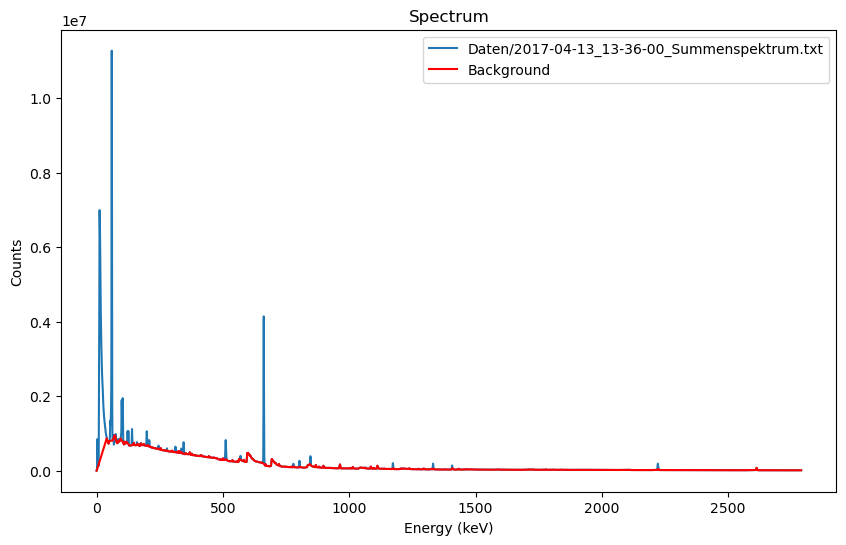

In [6]:
plot_spectrum_from_file(df.iloc[7]["filename"])

In [7]:

test_data = pd.read_table(df.iloc[7]["filename"], header=3)
test_data['energy in keV'] = test_data['energy in keV'].str.replace(',', '.').astype(float)
test_data


,energy in keV,counts
0,-0.65,354
1,-0.31,492
2,0.03,1756
3,0.38,8016
4,0.72,33162
...,...,...
8155,2788.42,12101
8156,2788.76,12139
8157,2789.11,12132
8158,2789.45,12360


C:\Users\felix\Documents\Arbeit\gammaspectroscopy\src\utils.py:178: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['filename'] = df['filename'].replace('\\', '/')


(8160, 3)


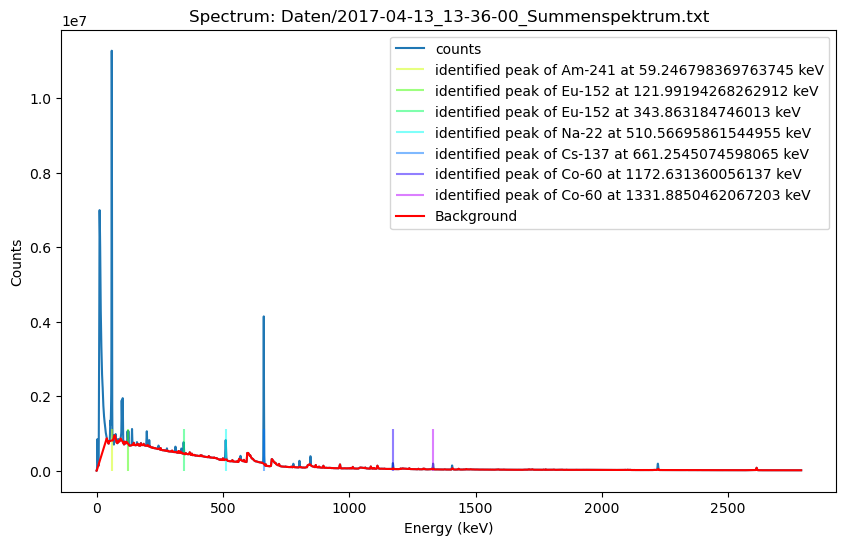

In [8]:
plot_spectrum(df.iloc[7])